<h1 style="text-align: center; font-weight: bold;">Amirali Rahimi 810100146</h1>
<h1 style="text-align: center;">CA3 - Hidden Markov Model</h1>

In [814]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import math

## Importing Data and Checking Corrolation Between Features

In [815]:
marketingDataDF = pd.read_csv("marketing_campaign.csv")
marketingDataDF.info()
marketingDataDF.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2240 non-null   int64  
 1   ID                 2240 non-null   int64  
 2   Year_Birth         2240 non-null   int64  
 3   Education          2240 non-null   object 
 4   Marital_Status     2240 non-null   object 
 5   Income             2017 non-null   float64
 6   Kidhome            2240 non-null   int64  
 7   Teenhome           2240 non-null   int64  
 8   Dt_Customer        2240 non-null   object 
 9   Recency            2240 non-null   int64  
 10  MntCoffee          2035 non-null   float64
 11  MntFruits          2240 non-null   int64  
 12  MntMeatProducts    2240 non-null   int64  
 13  MntFishProducts    2240 non-null   int64  
 14  MntSweetProducts   2240 non-null   int64  
 15  MntGoldProds       2227 non-null   float64
 16  NumWebVisitsMonth  2040 

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer
count,2240.000000,2240.000000,2240.000000,2017.000000,2240.000000,2240.000000,2240.000000,2035.000000,2240.000000,2240.000000,2240.000000,2240.000000,2227.000000,2040.000000,2240.000000,2240.000000,2240.000000
mean,1119.500000,5592.159821,1968.805804,52297.080317,0.437946,0.506250,49.109375,304.239312,26.302232,166.950000,37.525446,27.062946,43.847777,5.326961,0.009375,14.862054,0.271875
std,646.776623,3246.662198,11.984069,25543.108215,0.563666,0.544538,28.962453,337.515534,39.773434,225.715373,54.628979,41.280498,51.897098,2.439349,0.096391,7.677173,0.445025
min,0.000000,0.000000,1893.000000,2447.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,559.750000,2828.250000,1959.000000,35340.000000,0.000000,0.000000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,3.000000,0.000000,8.000000,0.000000
50%,1119.500000,5458.500000,1970.000000,51369.000000,0.000000,0.000000,49.000000,177.000000,8.000000,67.000000,12.000000,8.000000,24.000000,6.000000,0.000000,15.000000,0.000000
75%,1679.250000,8427.750000,1977.000000,68316.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,7.000000,0.000000,21.000000,1.000000
max,2239.000000,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,44.000000,1.000000


In [816]:
marketingDataDF = marketingDataDF.drop(marketingDataDF.columns[0], axis=1)
nullValueNums = {}
for data in marketingDataDF.columns:
    nullValueNums[data] = marketingDataDF[data].isna().sum()

totalRows = len(marketingDataDF)
nullValueRatio = {col:round(num/totalRows,2) for col,num in nullValueNums.items()}

nullSummaryDF = pd.DataFrame({
    'Feature Name': list(nullValueNums.keys()),
    'Number of NaNs': list(nullValueNums.values()),
    'Ratio of NaNs': list(nullValueRatio.values())
})

display(nullSummaryDF)

,Feature Name,Number of NaNs,Ratio of NaNs
0,ID,0,0.00
1,Year_Birth,0,0.00
2,Education,0,0.00
3,Marital_Status,0,0.00
4,Income,223,0.10
5,Kidhome,0,0.00
6,Teenhome,0,0.00
7,Dt_Customer,0,0.00
8,Recency,0,0.00
9,MntCoffee,205,0.09


In [817]:
# numericValues = marketingDataDF.select_dtypes(include=[np.number])
# corrMatrix = oneHotEncoded.corr()
# display(corrMatrix.style.background_gradient(cmap='coolwarm').format("{:.2f}"))
marketingDataDFEncoded = marketingDataDF.copy()
label_encoder = LabelEncoder()
for col in marketingDataDFEncoded.select_dtypes(include=[object]).columns:
    marketingDataDFEncoded[col] = label_encoder.fit_transform(marketingDataDFEncoded[col])
corrMatrix = marketingDataDFEncoded.corr()
display(corrMatrix.style.background_gradient(cmap='Blues').format("{:.2f}"))

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,NumPurchases,UsedCampaignOffer
ID,1.00,0.00,-0.00,0.02,0.02,0.00,-0.00,-0.03,-0.05,-0.02,0.00,-0.00,-0.02,-0.01,-0.01,-0.02,0.03,-0.02,-0.03
Year_Birth,0.00,1.00,-0.17,-0.06,-0.16,0.22,-0.35,-0.01,-0.02,-0.17,-0.02,-0.03,-0.04,-0.02,-0.05,0.13,-0.03,-0.17,-0.03
Education,-0.00,-0.17,1.00,0.01,0.13,-0.05,0.12,0.02,-0.01,0.20,-0.08,0.03,-0.11,-0.11,-0.10,-0.04,-0.05,0.09,0.07
Marital_Status,0.02,-0.06,0.01,1.00,0.02,-0.02,-0.00,-0.02,0.01,0.01,0.00,0.03,0.04,0.02,0.00,-0.04,-0.01,0.00,0.00
Income,0.02,-0.16,0.13,0.02,1.00,-0.40,0.02,-0.03,-0.00,0.56,0.42,0.57,0.43,0.43,0.32,-0.54,-0.03,0.56,0.23
Kidhome,0.00,0.22,-0.05,-0.02,-0.40,1.00,-0.03,-0.01,0.02,-0.48,-0.35,-0.42,-0.37,-0.35,-0.33,0.42,0.04,-0.45,-0.17
Teenhome,-0.00,-0.35,0.12,-0.00,0.02,-0.03,1.00,0.01,0.02,0.02,-0.18,-0.26,-0.20,-0.16,-0.02,0.13,0.00,0.13,-0.13
Dt_Customer,-0.03,-0.01,0.02,-0.02,-0.03,-0.01,0.01,1.00,0.01,-0.00,-0.02,-0.01,-0.02,0.00,0.00,0.02,-0.01,-0.01,0.00
Recency,-0.05,-0.02,-0.01,0.01,-0.00,0.02,0.02,0.01,1.00,0.02,-0.00,0.02,0.00,0.02,0.02,-0.02,0.01,0.01,-0.10
MntCoffee,-0.02,-0.17,0.20,0.01,0.56,-0.48,0.02,-0.00,0.02,1.00,0.38,0.56,0.40,0.38,0.39,-0.32,-0.04,0.72,0.43


In [818]:
target = 'NumPurchases'
sorted_features = corrMatrix[target].sort_values(ascending=False)
top_four_features = sorted_features[1:5]
for feature, corr in top_four_features.items():
    print(feature)

MntCoffee
Income
MntMeatProducts
MntGoldProds


In [819]:
def draw_histograms(df, title):
    fig, axs = plt.subplots(5, 4)
    fig.suptitle(title, fontsize=25)
    fig.set_figheight(20)
    fig.set_figwidth(25)
    i=0
    for col in df.columns:
        df[col].hist(ax=axs[int(i/4)][(i%4)])
        axs[int(i/4)][(i%4)].set_title(col)
        i += 1
    plt.show()

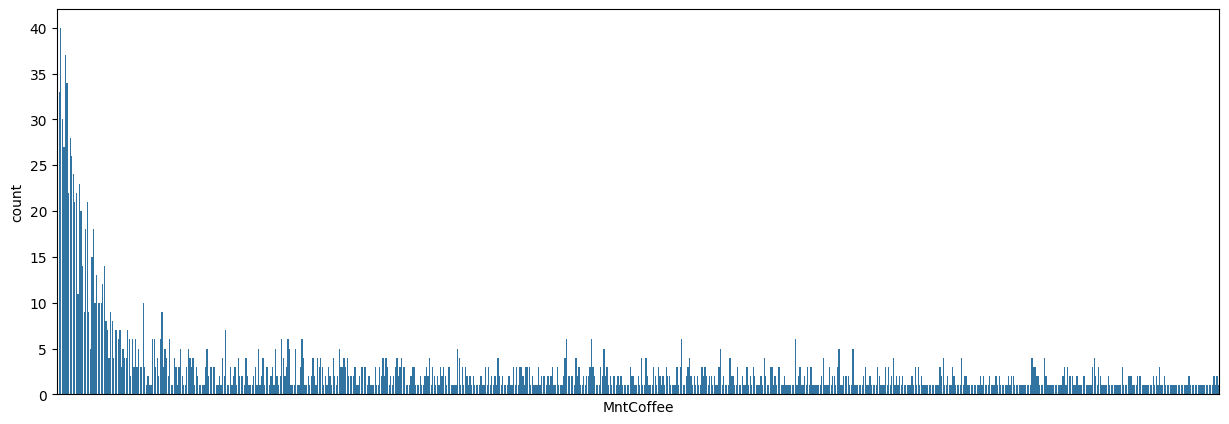

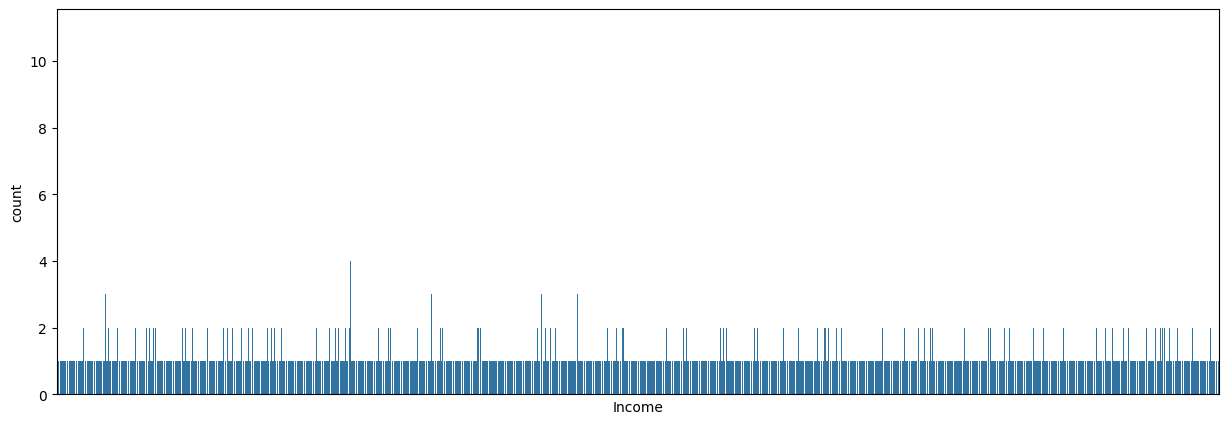

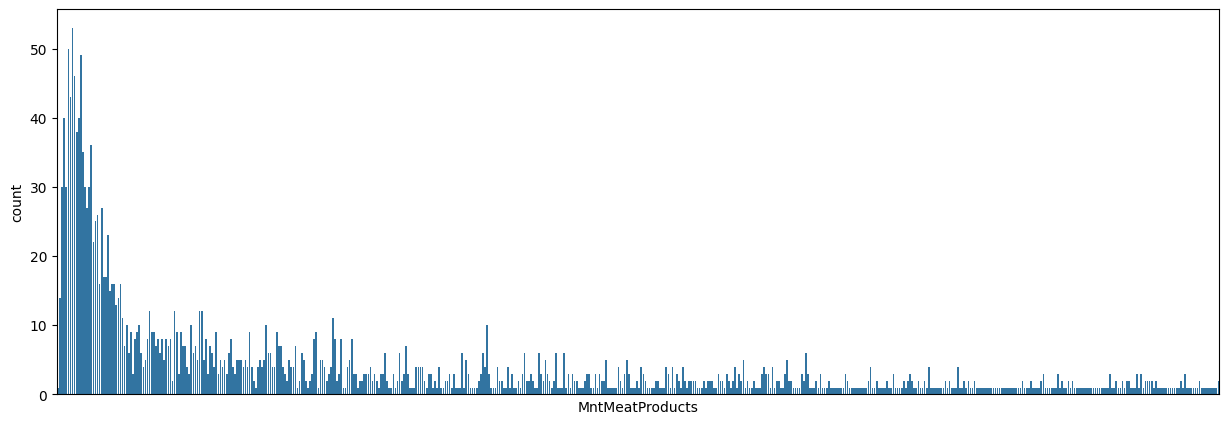

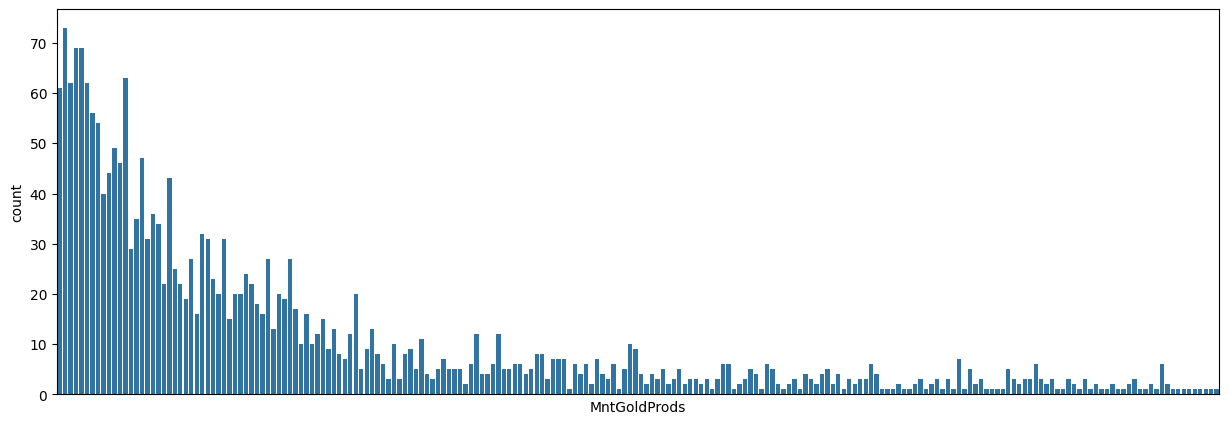

In [820]:
for feature, corr in top_four_features.items():
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=90)
    sb.countplot(data=marketingDataDFEncoded, x=feature)
    plt.xticks(ticks=[], labels=[])

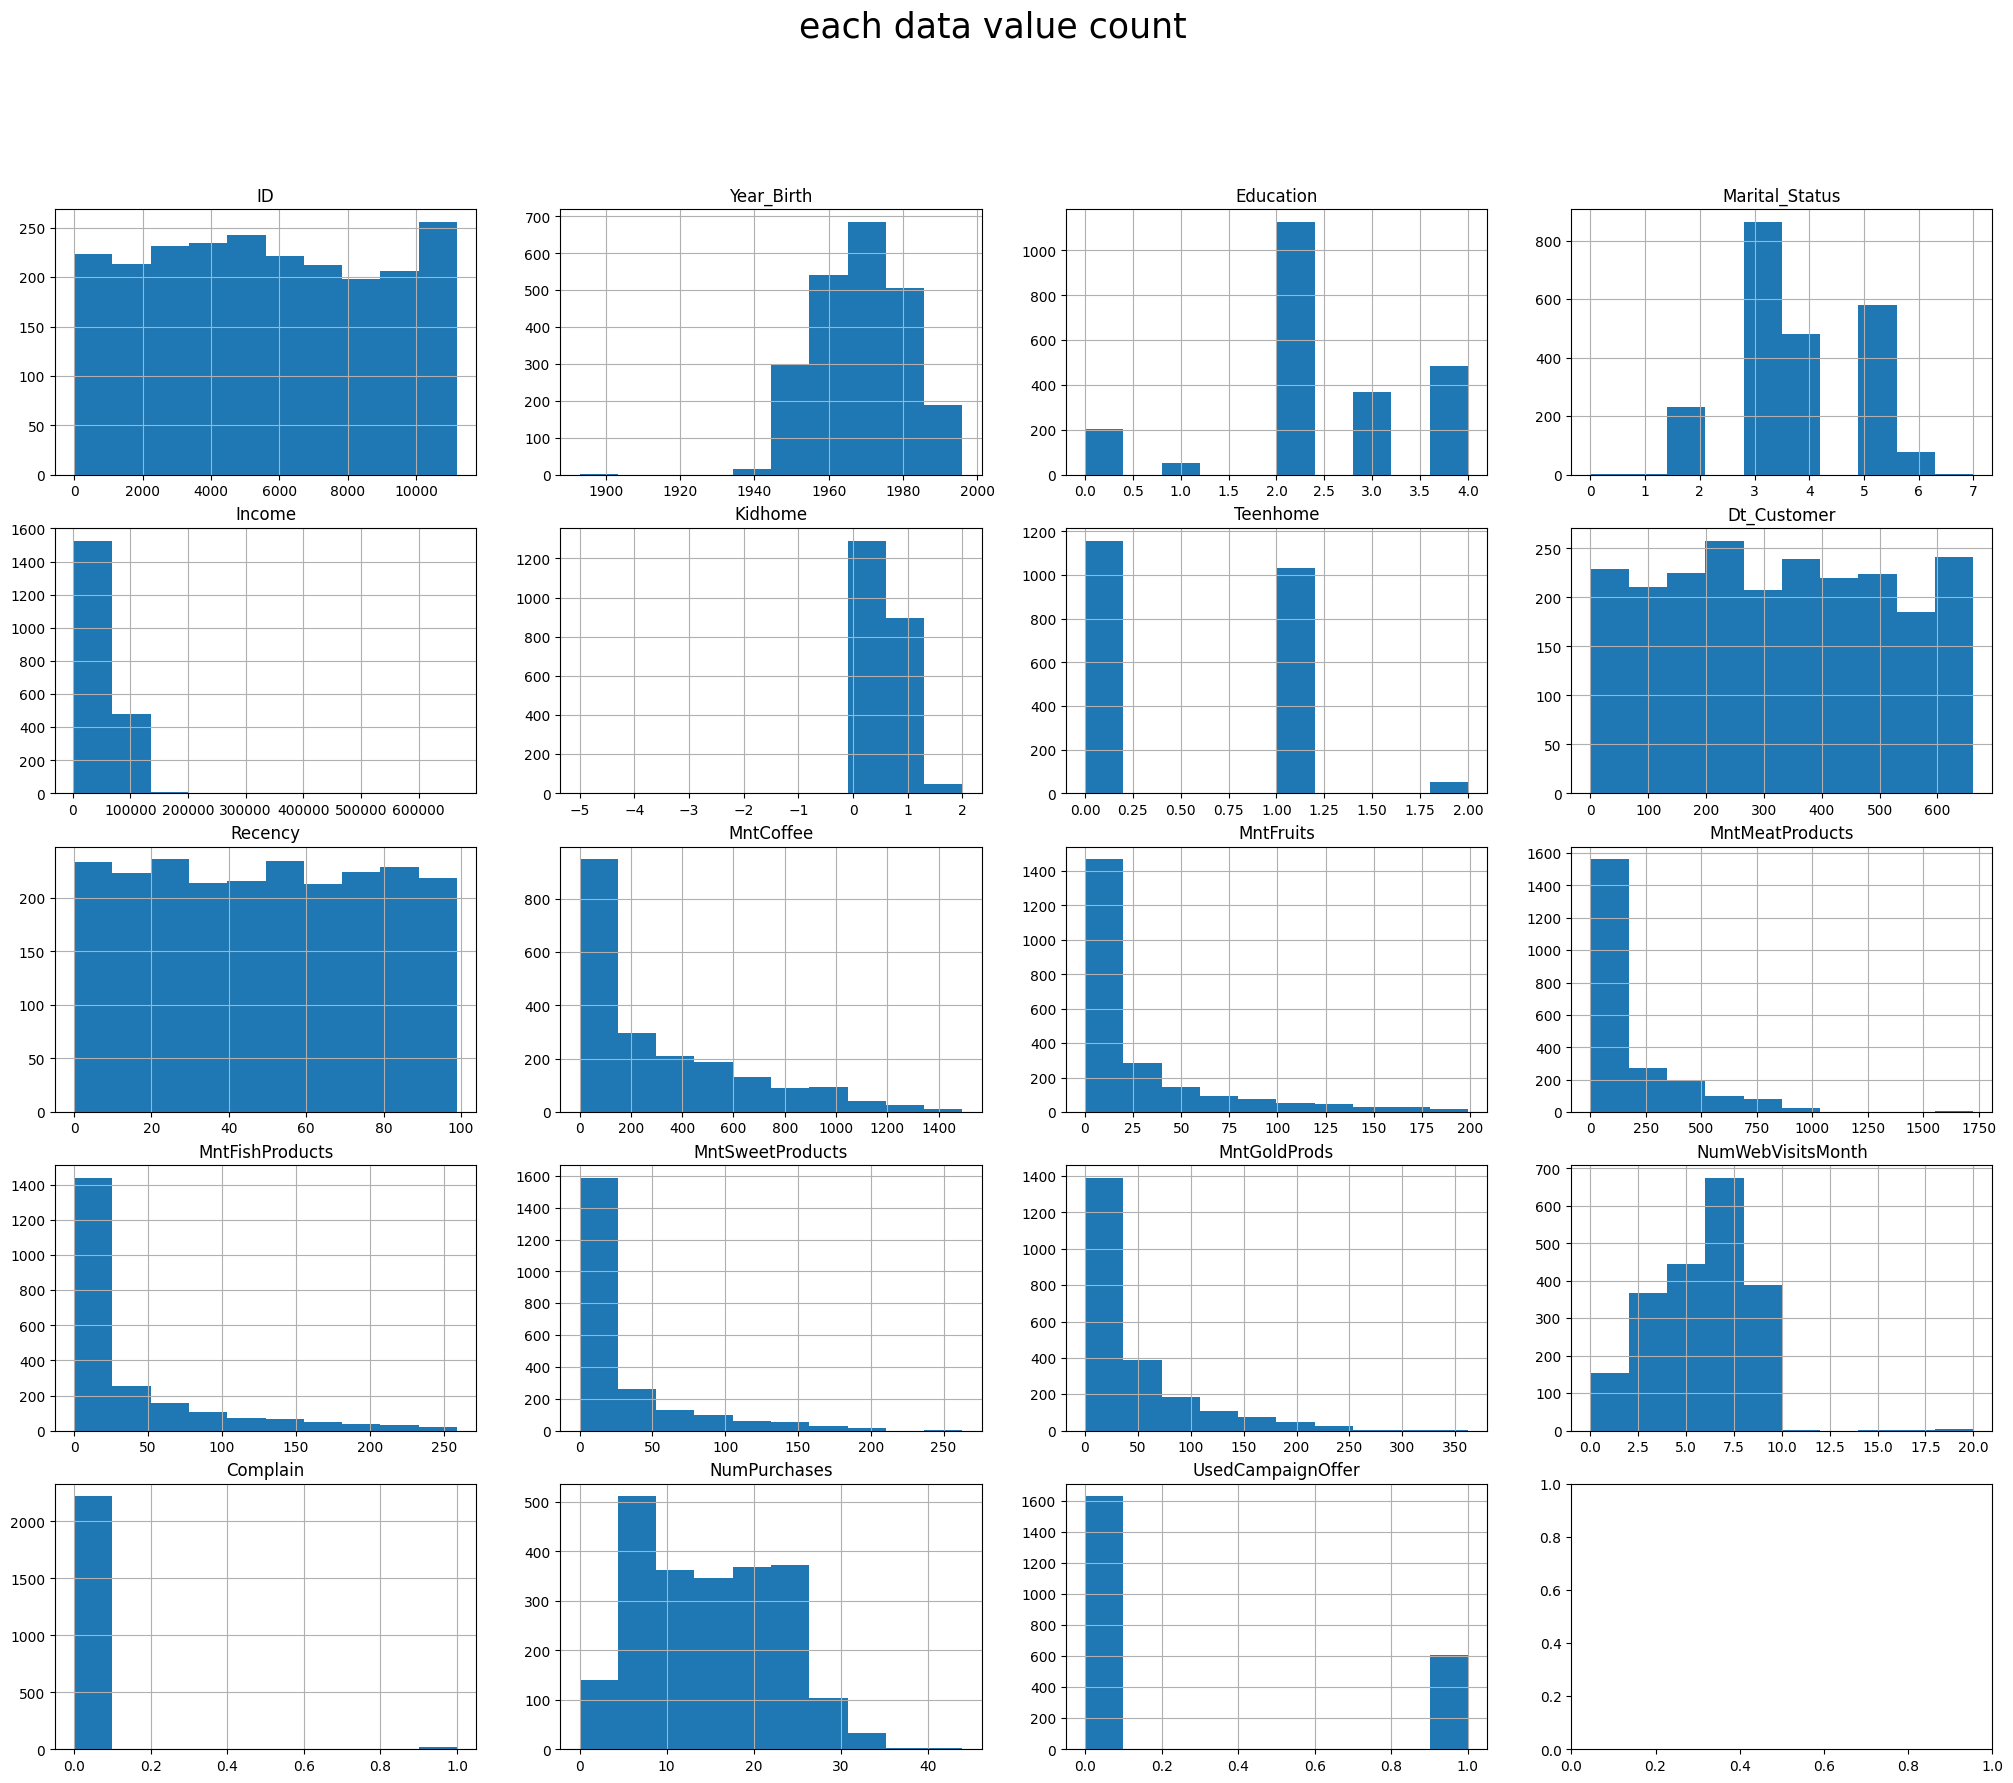

In [821]:
draw_histograms(marketingDataDFEncoded, "each data value count")

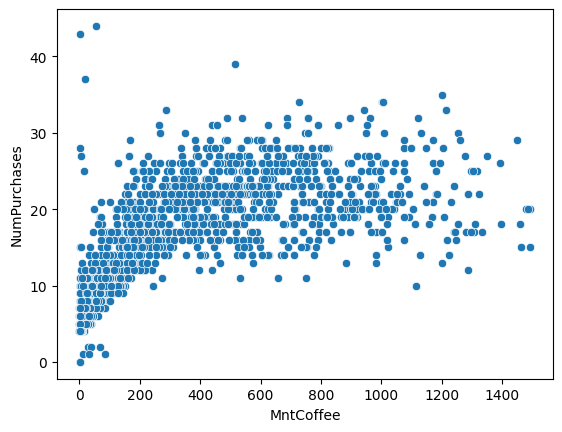

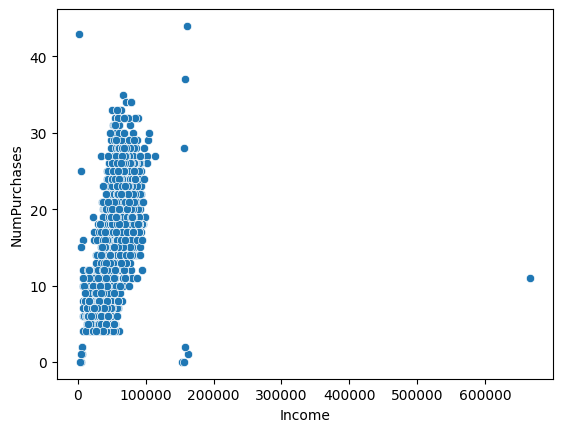

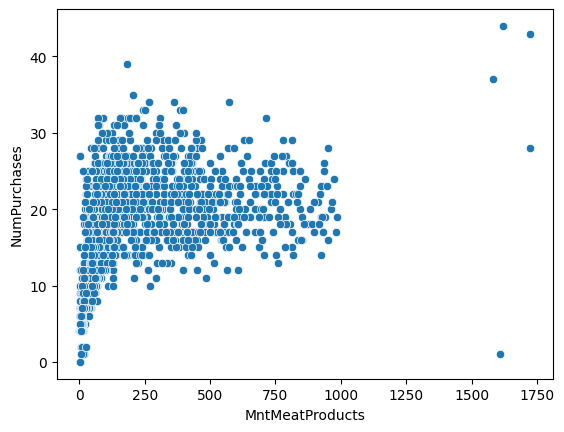

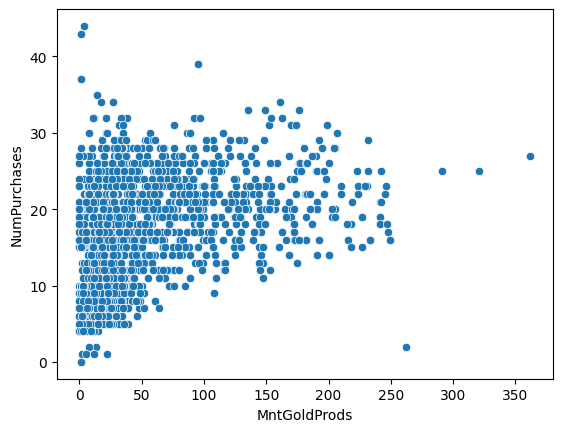

In [822]:
for feature, corr in top_four_features.items():
    plt.figure()
    sb.scatterplot(data=marketingDataDFEncoded, x=feature, y=target)

## Preprocess on Samples:

In [823]:
for feature in marketingDataDFEncoded.columns:
    marketingDataDFEncoded[feature] = marketingDataDFEncoded[feature].fillna(marketingDataDFEncoded[feature].mean())

In [824]:
normalizeScaler = MinMaxScaler()
targetCol = marketingDataDFEncoded[target]
normalizedDF = pd.DataFrame(normalizeScaler.fit_transform(marketingDataDFEncoded), columns=marketingDataDFEncoded.columns)
standardScaler = StandardScaler()
standardizedDF = pd.DataFrame(standardScaler.fit_transform(normalizedDF), columns=normalizedDF.columns)
standardizedDF[target] = targetCol
trainData, testData = train_test_split(standardizedDF, test_size=0.2)
# draw_histograms(trainData, "train data")
# draw_histograms(testData, "test data")

# Linear Regression

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [825]:
def simple_linear_regression(input_feature_train, output):
    alpha_numerator = ((input_feature_train - input_feature_train.mean()) * (output - output.mean())).sum()
    alpha_denumerator = ((input_feature_train - input_feature_train.mean())**2).sum()
    alpha = alpha_numerator / alpha_denumerator
    beta = output.mean() - alpha * input_feature_train.mean()
    return alpha, beta

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [826]:
def get_regression_predictions(input_feature_test, bias, slope):
    prediction = slope * input_feature_test + bias
    return prediction

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [827]:
def get_root_mean_square_error(predicted_values, outputs):
    return math.sqrt(((outputs - predicted_values)**2).mean())

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [828]:
def get_r2_score(predicted_values, outputs):
    return 1 - (((outputs - predicted_values)**2).sum() / ((outputs - outputs.mean())**2).sum())

Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

In [829]:
root_mean_square_values = {feature : 0 for feature, corr in top_four_features.items()}
r2_score_values = {feature : 0 for feature, corr in top_four_features.items()}
for feature, corr in top_four_features.items():
    alpha, beta = simple_linear_regression(trainData[feature], trainData[target])
    predicted_values = get_regression_predictions(testData[feature], beta, alpha)
    root_mean_square = get_root_mean_square_error(predicted_values, testData[target])
    root_mean_square_values[feature] = round(root_mean_square, 2)
    r2_score = get_r2_score(predicted_values, testData[target])
    r2_score_values[feature] = round(r2_score, 2)
    
scores = pd.DataFrame({
    'Feature Name': list(top_four_features.keys()),
    'root mean square': list(root_mean_square_values.values()),
    'r2 score': list(r2_score_values.values())
})

display(scores)

,Feature Name,root mean square,r2 score
0,MntCoffee,5.84,0.45
1,Income,9.22,-0.38
2,MntMeatProducts,6.32,0.35
3,MntGoldProds,6.81,0.25


# Multiple Regression

Multiple regression is a statistical technique that aims to model the relationship between a dependent variable and two or more independent variables.

Multiple regression with n independent variables is expressed as follows:

$$f(x) = \beta _{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{3} + \beta_{4} x_{4} + ... + \beta_{n} x_{n} + c $$

To optimize the model for accurate predictions, multiple regression commonly employs iterative algorithms such as gradient descent.

The main goal of the optimization process is to make our predictions as close as possible to the actual values.
We measure the prediction error using a cost function, usually denoted as $J(\beta)$.

$$ J(\beta)= \frac {1}{2m} Σ_{i=0}^{m-1}(y_i - (\hat \beta _{0} + \hat \beta_{1} x_{1} + \hat \beta_{2} x_{2} + \hat \beta_{3} x_{3} + \hat \beta_{4} x_{4} + ... + \hat \beta_{n} x_{n}) )^2  $$

Gradient descent iteratively adjusts the coefficients $(\beta_i)$ to minimize the cost function. The update rule for each coefficient is:

$$\beta_{i} = \beta _ {i} - \alpha \frac {∂J(\beta)}{∂\beta_{i}}$$

$$ \frac {∂J(\beta)}{∂\beta_{i}} = \frac {1}{m}Σ_{j=0}^{m-1}(y_j - (\hat \beta _{0} + \hat \beta_{1} x_{j1} + \hat \beta_{2} x_{j2} + \hat \beta_{3} x_{j3} + \hat \beta_{4} x_{j4} + ... + \hat \beta_{n} x_{jn})) x_{ji} $$



## Predicting output given regression weights

Based on the formula above and [np.dot()](https://numpy.org/doc/stable/reference/generated/numpy.dot.html) method, complete this function to compute the predictions for an entire matrix of features given the matrix, bias, and the weights. Provide an explanation of np.dot method and the reasoning behind using this method in your code:

In [830]:
def predict_output(feature_matrix, weights, bias):
    return np.dot(feature_matrix, weights) + bias

## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [831]:
def feature_derivative(errors, feature):
    return 2 * np.dot(errors, feature)

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

In [832]:
def regression_gradient_descent(feature_matrix, outputs, initial_weights, bias, step_size, tolerance):
    weights = np.array(initial_weights)
    converged = False
    while not converged:
        predictions = predict_output(feature_matrix, weights, bias)
        errors = outputs - predictions

        gradient = - feature_derivative(feature_matrix.T, errors)
        weights -= step_size * gradient

        bias_gradient = -2 * np.sum(errors)
        bias -= step_size * bias_gradient

        if np.linalg.norm(gradient) < tolerance:
            converged = True

    return weights, bias

In [833]:
def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame


def n_feature_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']
    
    weights, bias = regression_gradient_descent(chosen_feature_matrix, target_matrix, initial_weights, bias, step_size, tolerance)
    return weights, bias

def get_weights_and_bias(chosen_features):
    keywords = {
        'initial_weights': np.array([.5]*len(chosen_features)),
        'step_size': 1.e-4,
        'tolerance': 1.e-10,
        'bias': 0
    }
    chosen_feature_dataframe = trainData[chosen_features]
    chosen_feature_matrix = chosen_feature_dataframe.to_numpy()

    target_column = trainData[target]
    target_matrix = target_column.to_numpy()

    train_weights, bias = n_feature_regression(chosen_feature_matrix, target_matrix, keywords)

    return chosen_feature_matrix, train_weights, bias

## Two Feature Regression

In this part, you should choose 2 features and implement multiple regression on them :

In [834]:
corrMatrix = standardizedDF.corr()
sorted_features = corrMatrix[target].sort_values(ascending=False)
top_five_features = list(sorted_features[1:6].keys())
print(f"top five features are: {top_five_features}")

chosen_features = top_five_features[0:2]
chosen_feature_matrix, train_weights, bias = get_weights_and_bias(chosen_features)

top five features are: ['MntCoffee', 'MntMeatProducts', 'Income', 'MntGoldProds', 'MntSweetProducts']


In [835]:
predicted_values = predict_output(testData[chosen_features], train_weights, bias)

In [836]:
root_square = get_root_mean_square_error(predicted_values, testData[target])
r2_score = get_r2_score(predicted_values, testData[target])

print(f"root square is: {root_square}")
print(f"r2 score is: {r2_score}")

root square is: 5.471631910568298
r2 score is: 0.515114118321009


## Three Feature Regression

Now repeat the steps for 3 features

In [837]:
chosen_features = top_five_features[0:3]
chosen_feature_matrix, train_weights, bias = get_weights_and_bias(chosen_features)

In [838]:
predicted_values = predict_output(testData[chosen_features], train_weights, bias)

In [839]:
root_square = get_root_mean_square_error(predicted_values, testData[target])
r2_score = get_r2_score(predicted_values, testData[target])

print(f"root square is: {root_square}")
print(f"r2 score is: {r2_score}")

root square is: 5.987963729002221
r2 score is: 0.41928356980300185


## Five Feature Regression

Finally, repeat the steps for 5 features

Explain the differences in the results and the reasoning behind these variations.

In [840]:
chosen_features = top_five_features
chosen_feature_matrix, train_weights, bias = get_weights_and_bias(chosen_features)

In [841]:
predicted_values = predict_output(testData[chosen_features], train_weights, bias)

In [842]:
root_square = get_root_mean_square_error(predicted_values, testData[target])
r2_score = get_r2_score(predicted_values, testData[target])

print(f"root square is: {root_square}")
print(f"r2 score is: {r2_score}")

root square is: 5.364270686793812
r2 score is: 0.533955742520414


## Classification

### Creating New Column For PurchaseRate

In [843]:
def findPurchaseRate(purchaseNum, median):
    if(purchaseNum >= median):
        return "HIGH"
    else:
        return "LOW"

In [844]:
purchaseRate = "PurchaseRate"
standardizedDF[purchaseRate] = standardizedDF[target].apply(findPurchaseRate, median=standardizedDF[target].median())
standardizedDF = standardizedDF.drop(target, axis=1)
standardizedDF.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoffee,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebVisitsMonth,Complain,UsedCampaignOffer,PurchaseRate
0,-0.020999,-0.985345,-0.350141,0.251004,0.241038,-0.777134,-0.929894,-1.303763,0.307039,1.028416e+00,1.551577,1.679702,2.462147,1.476500,0.853436,0.000000,-0.097282,1.636509,HIGH
1,-1.053058,-1.235733,-0.350141,0.251004,-0.245667,0.997361,0.906934,-0.898762,-0.383664,1.288442e-16,-0.636301,-0.713225,-0.650449,-0.631503,-0.731575,-0.140487,-0.097282,-0.611057,LOW
2,-0.447070,-0.317643,-0.350141,1.180340,0.797114,-0.777134,-0.929894,0.610786,-0.798086,1.288442e-16,0.570804,-0.177032,1.345274,-0.146905,-0.035716,0.000000,-0.097282,-0.611057,HIGH
3,0.181716,1.268149,-0.350141,1.180340,-1.058548,0.997361,-0.929894,-0.677853,-0.798086,-9.117525e-01,-0.560857,-0.651187,-0.503974,-0.583043,-0.750904,0.289189,-0.097282,-0.611057,LOW
4,-0.082614,1.017761,1.428354,-0.678332,0.247435,0.997361,-0.929894,0.326760,1.550305,-4.080550e-01,0.419916,-0.216914,0.155164,-0.001525,-0.557610,-0.140487,-0.097282,-0.611057,HIGH


In [845]:
newTarget = purchaseRate

In [846]:
def divideToXY(data):
    X = data.drop(newTarget, axis=1)
    Y = data[newTarget]
    return X, Y

In [847]:
def visualizeDT(DTClassifier, trainData):
    feature_names_list = trainData.columns.tolist()
    class_names_list = [str(cls) for cls in DTClassifier.classes_]
    
    plt.figure(figsize=(30, 10))
    plot_tree(
        DTClassifier,
        filled=True,
        feature_names=feature_names_list,
        class_names=class_names_list,
    )
    plt.show()

In [848]:
trainData, testData = train_test_split(standardizedDF, test_size=0.2)
XTrain, YTrain = divideToXY(trainData)
XTest, YTest = divideToXY(testData)

In [849]:
def calculate_accuracy(confusion_matrix):
    correct_predictions = confusion_matrix.trace()
    total_predictions = confusion_matrix.sum()
    accuracy = correct_predictions / total_predictions
    return accuracy

### Decision Tree

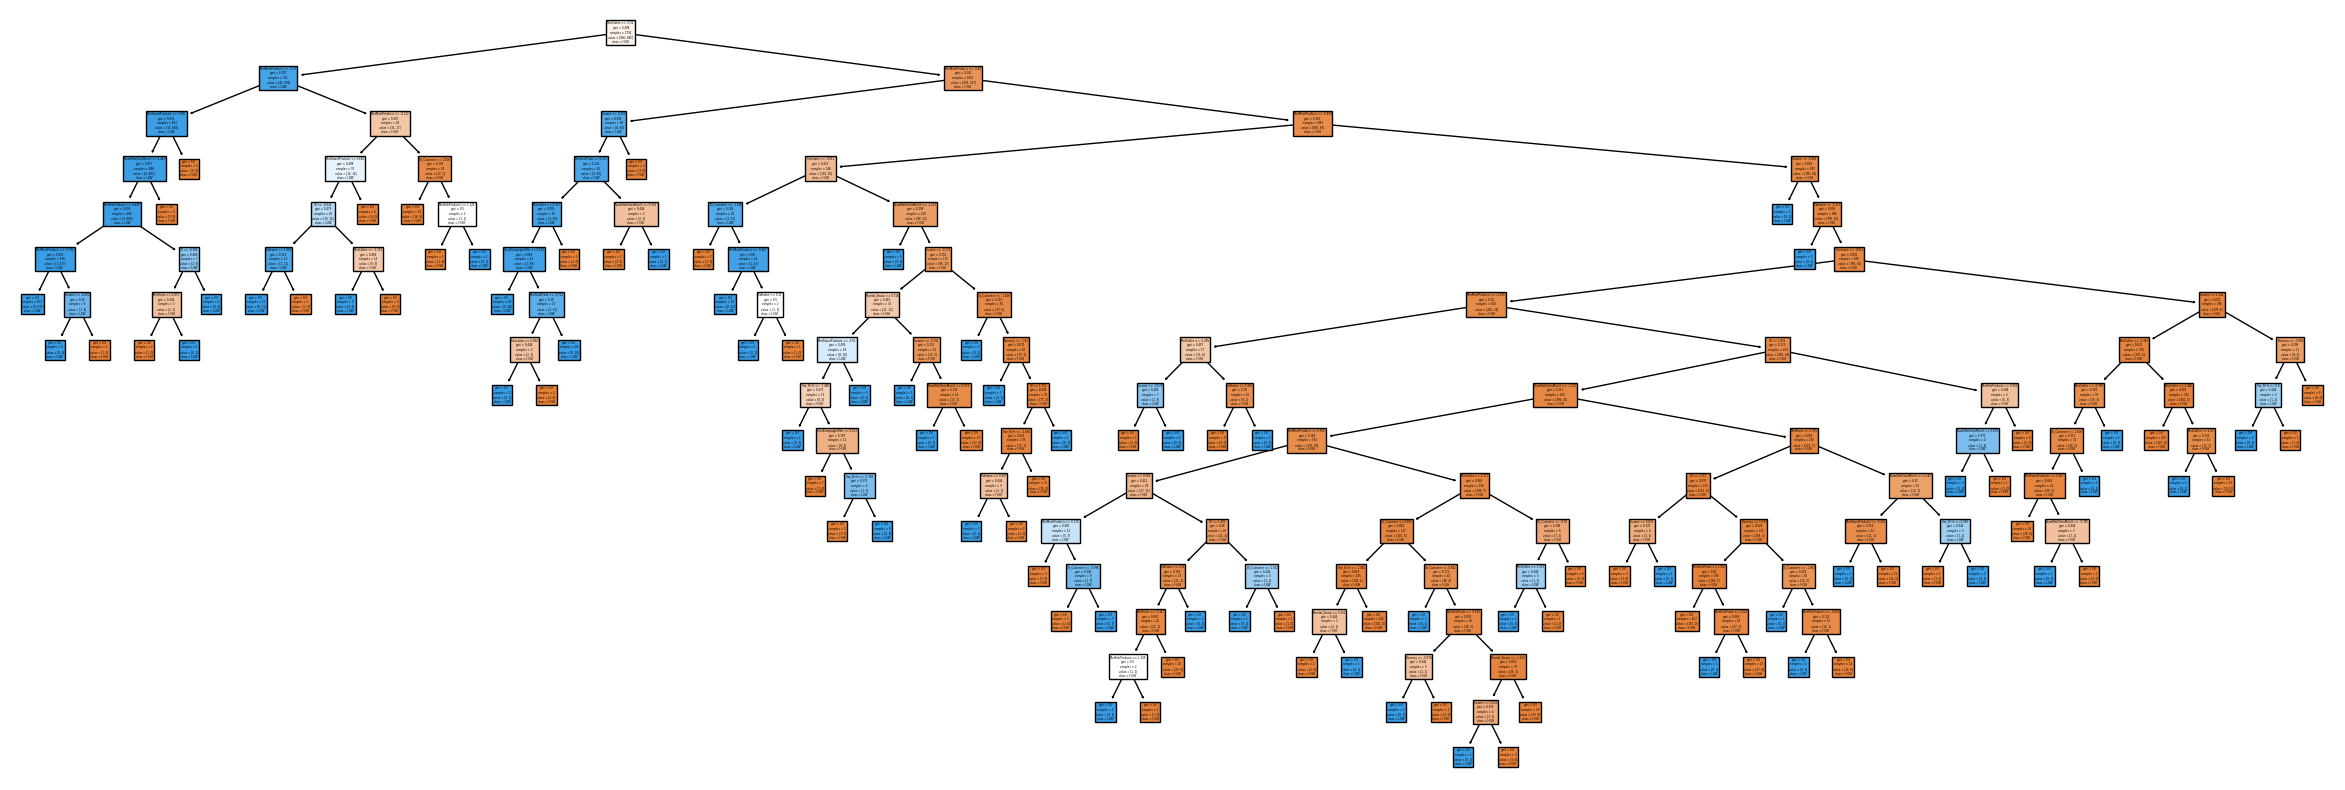

In [850]:
DTClassifer = DecisionTreeClassifier()
DTClassifer.fit(XTrain, YTrain)
visualizeDT(DTClassifer, trainData)
prediction = DTClassifer.predict(XTest)

In [851]:
def visualizeConMat(confusionMat):
    plt.figure(figsize=(10,7))
    labels = ['LOW', 'HIGH']
    sb.heatmap(confusionMat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

Accuracy is: 89.73%


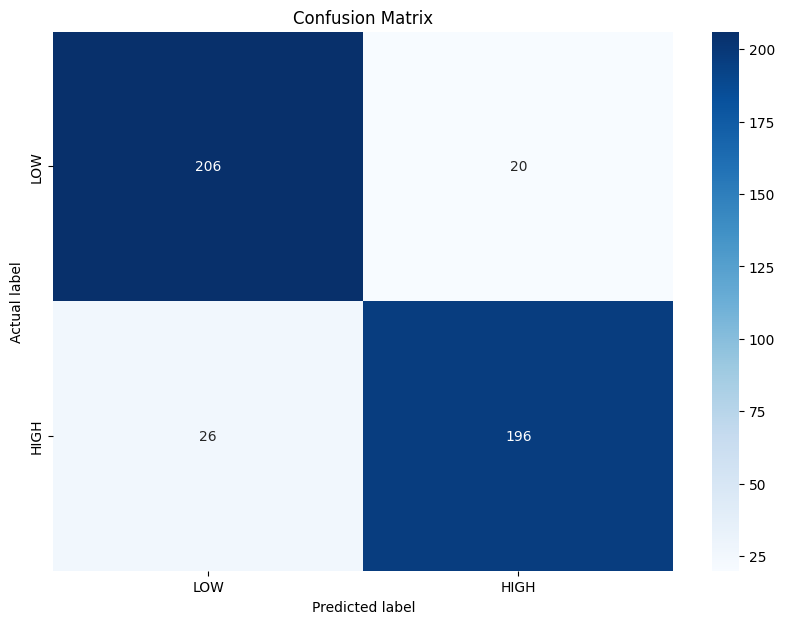

In [852]:
confusionMat = confusion_matrix(YTest, prediction)
accuracy = calculate_accuracy(confusionMat)
print(f"Accuracy is: {accuracy:.2%}")
visualizeConMat(confusionMat)


### K Nearest Neighbors

In [853]:
KNNClassifier = KNeighborsClassifier()
KNNClassifier.fit(XTrain, YTrain)
prediction = KNNClassifier.predict(XTest)

Accuracy is: 86.61%


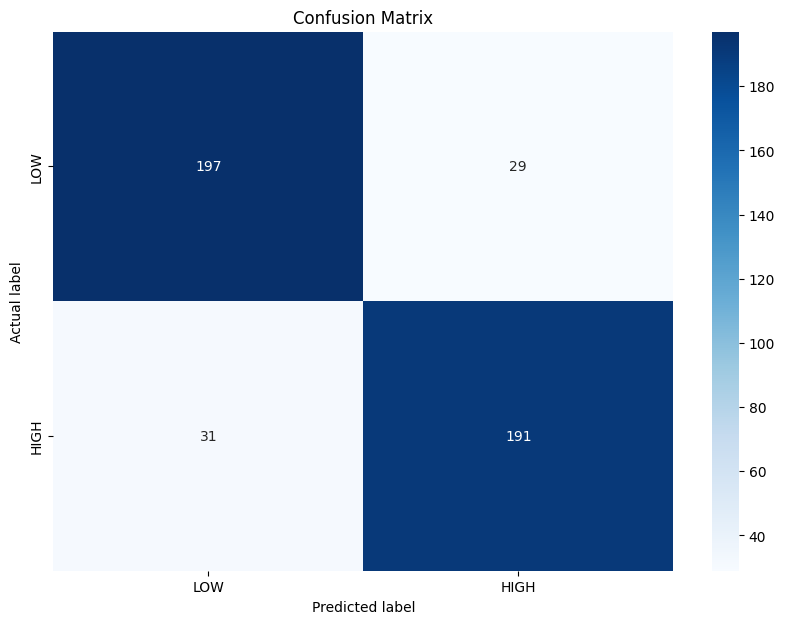

In [854]:
confusionMat = confusion_matrix(YTest, prediction)
accuracy = calculate_accuracy(confusionMat)
print(f"Accuracy is: {accuracy:.2%}")
visualizeConMat(confusionMat)

In [855]:
LRClassifier = LogisticRegression()
LRClassifier.fit(XTrain, YTrain)
prediction = LRClassifier.predict(XTest)

Accuracy is: 90.18%


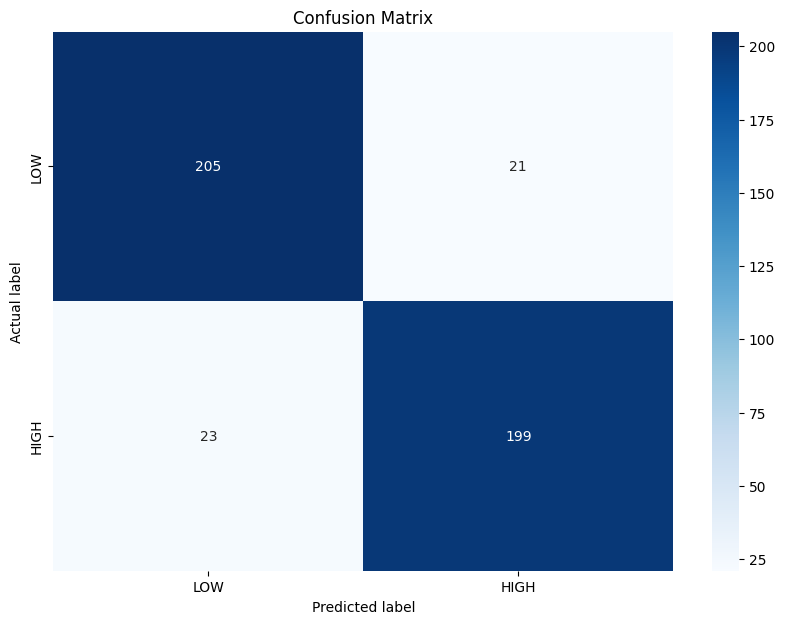

In [856]:
confusionMat = confusion_matrix(YTest, prediction)
accuracy = calculate_accuracy(confusionMat)
print(f"Accuracy is: {accuracy:.2%}")
visualizeConMat(confusionMat)

### Search Grid Search

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 54, 'splitter': 'best'}
Decison Tree Test Accuracy: 91.96%
Decison Tree Train Accuracy: 95.15%


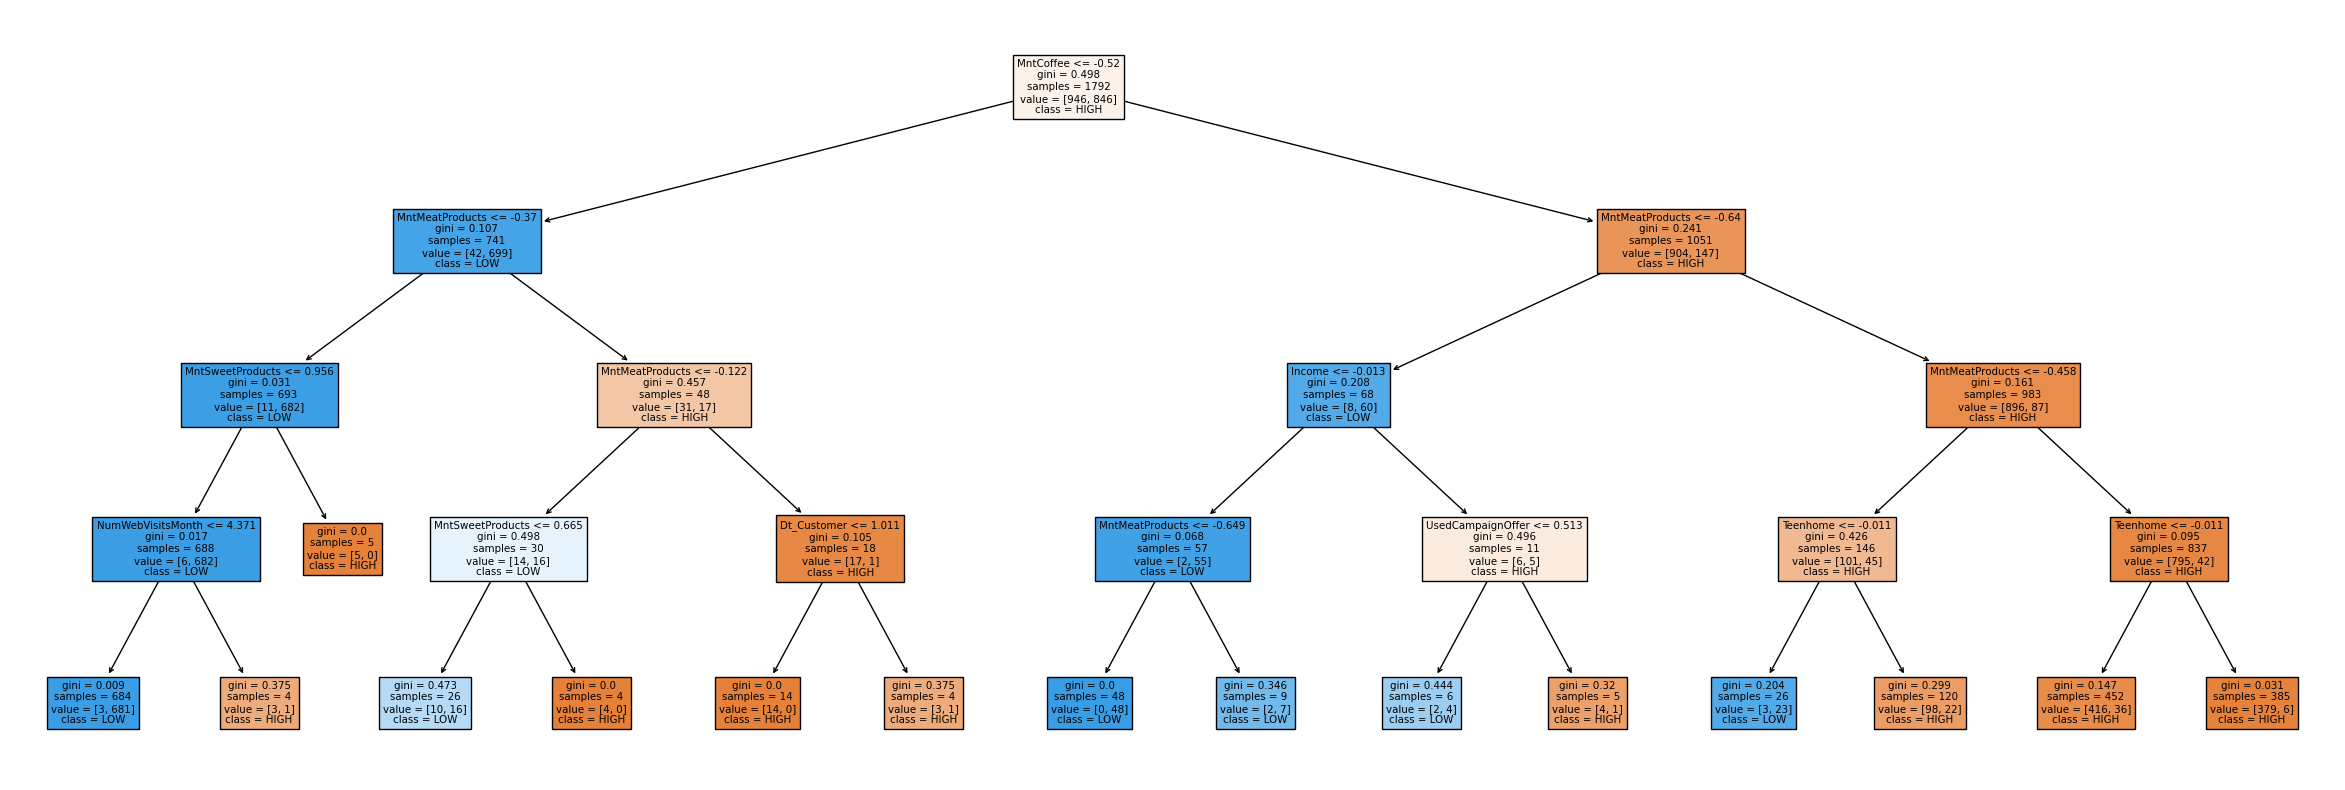

In [857]:
grid = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": list(range(1, 11)) + [None],
    "min_samples_split": range(2, 11),
    "min_samples_leaf": range(1, 11),
    "random_state": [54],
}

gridSearchDT = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=grid,
    scoring="accuracy",
    cv=10,
    n_jobs=-1,
)

gridSearchDT.fit(XTrain, YTrain)
print(f"Best Parameters: {gridSearchDT.best_params_}")
print(f"Decison Tree Test Accuracy: {gridSearchDT.score(XTest, YTest):.2%}")
print(f"Decison Tree Train Accuracy: {gridSearchDT.score(XTrain, YTrain):.2%}")
visualizeDT(gridSearchDT.best_estimator_, trainData)

In [863]:
grid = {
    "n_neighbors": list(range(1, 10)) + list(range(20, 61, 10)), 
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "leaf_size": [10, 20],
    "p": [1, 2],
}

gridSearchKNN = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=grid,
    scoring="accuracy",
    cv=10,
    n_jobs=-1,
)

gridSearchKNN.fit(XTrain, YTrain)
print(f"Best Parameters: {gridSearchKNN.best_params_}")
print(f"KNN Test Accuracy: {gridSearchKNN.score(XTest, YTest):.2%}")
print(f"KNN Train Accuracy: {gridSearchKNN.score(XTrain, YTrain):.2%}")

Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
KNN Test Accuracy: 88.39%
KNN Train Accuracy: 94.03%


In [859]:
grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l2"],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
}
gridSearchLR = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=grid,
    scoring="accuracy",
    cv=10,
    n_jobs=-1,
)
gridSearchLR.fit(XTrain, YTrain)
print(f"Best Parameters: {gridSearchLR.best_params_}")
print(f"Logistic Regression Test Accuracy: {gridSearchLR.score(XTest, YTest):.2%}")
print(f"Logistic Regression Train Accuracy: {gridSearchLR.score(XTrain, YTrain):.2%}")

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Logistic Regression Test Accuracy: 89.96%
Logistic Regression Train Accuracy: 91.74%


### Random Forest

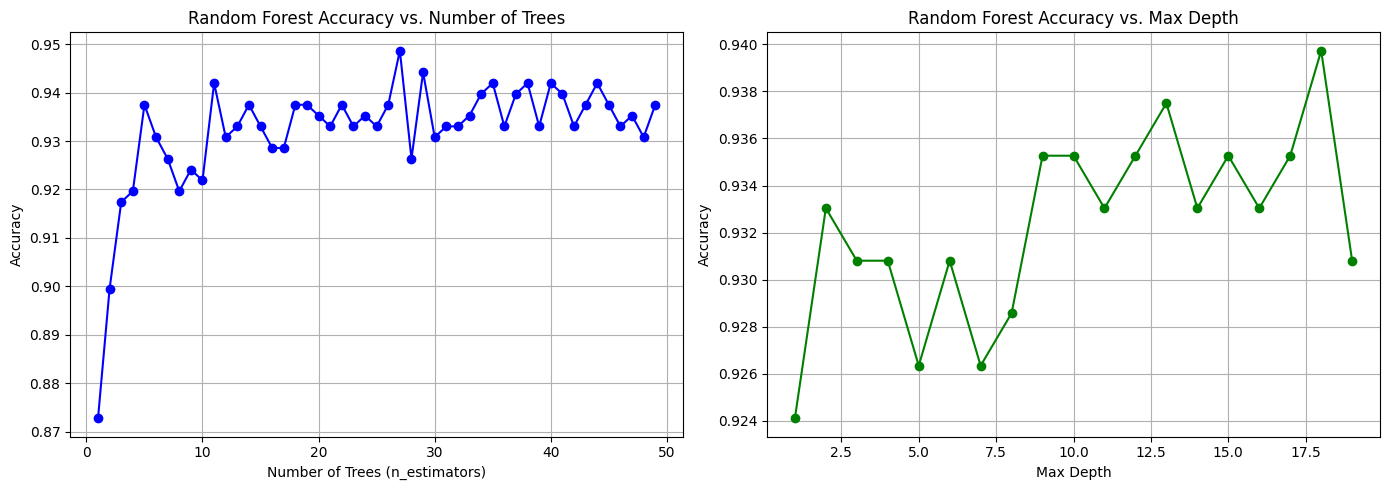

In [866]:
n_estimators_range = range(1, 50)
max_depth_range = range(1, 20)

n_estimator_scores = []
for i in n_estimators_range:
    forest_model = RandomForestClassifier(n_estimators=i)
    forest_model.fit(XTrain, YTrain)
    n_estimator_scores.append(forest_model.score(XTest, YTest))

max_depth_scores = []
for i in max_depth_range:
    forest_model = RandomForestClassifier(max_depth=i)
    forest_model.fit(XTrain, YTrain)
    max_depth_scores.append(forest_model.score(XTest, YTest))
    
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot(n_estimators_range, n_estimator_scores, marker='o', linestyle='-', color='b')
ax[0].set_title('Random Forest Accuracy vs. Number of Trees')
ax[0].set_xlabel('Number of Trees')
ax[0].set_ylabel('Accuracy')
ax[0].grid(True)

ax[1].plot(max_depth_range, max_depth_scores, marker='o', linestyle='-', color='g')
ax[1].set_title('Random Forest Accuracy vs. Max Depth')
ax[1].set_xlabel('Max Depth')
ax[1].set_ylabel('Accuracy')
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
DTClassifer = DecisionTreeClassifier()
DTClassifer.fit(XTrain, YTrain)
forest_model = RandomForestClassifier()
forest_model.fit(XTrain, YTrain)